In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import torch
import torch.nn as nn
from torch.autograd import Variable
import time
import seaborn as sns

In [2]:
key = "9e75e79c055470945cddfc527587d6ea600f5348"

In [3]:
#Google's initial public offering (IPO) took place on August 19, 2004.
df = pdr.get_data_tiingo('GOOGL',start='August 19, 2004', api_key=key)

d:\Software\miniconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [4]:
df

close      high     low    open    volume  \
symbol date                                                                     
GOOGL  2004-08-19 00:00:00+00:00  100.335  104.0600   95.96  100.01  44659000   
       2004-08-20 00:00:00+00:00  108.310  109.0800  100.50  101.01  22834300   
       2004-08-23 00:00:00+00:00  109.400  113.4800  109.05  110.76  18256100   
       2004-08-24 00:00:00+00:00  104.870  111.6000  103.57  111.24  15247300   
       2004-08-25 00:00:00+00:00  106.000  108.0000  103.88  104.76   9188600   
...                                   ...       ...     ...     ...       ...   
       2022-11-11 00:00:00+00:00   96.410   96.9300   93.92   94.69  33090482   
       2022-11-14 00:00:00+00:00   95.700   96.7900   94.51   95.09  30179539   
       2022-11-15 00:00:00+00:00   98.440  100.1400   96.71   98.26  41640816   
       2022-11-16 00:00:00+00:00   98.850   99.6375   97.64   97.90  29105154   
       2022-11-17 00:00:00+00:00   98.360   99.2800   96.79   96.97  26052599   

                                   adjClose     adjHigh     adjLow    adjOpen  \
symbol date                                                                     
GOOGL  2004-08-19 00:00:00+00:00   2.516142    2.609555   2.406428   2.507992   
       2004-08-20 00:00:00+00:00   2.716134    2.735444   2.520280   2.533069   
       2004-08-23 00:00:00+00:00   2.743469    2.845785   2.734692   2.777574   
       2004-08-24 00:00:00+00:00   2.629868    2.798639   2.597268   2.789611   
       2004-08-25 00:00:00+00:00   2.658206    2.708360   2.605042   2.627110   
...                                     ...         ...        ...        ...   
       2022-11-11 00:00:00+00:00  96.410000   96.930000  93.920000  94.690000   
       2022-11-14 00:00:00+00:00  95.700000   96.790000  94.510000  95.090000   
       2022-11-15 00:00:00+00:00  98.440000  100.140000  96.710000  98.260000   
       2022-11-16 00:00:00+00:00  98.850000   99.637500  97.640000  97.900000   
       2022-11-17 00:00:00+00:00  98.360000   99.280000  96.790000  96.970000   

                                   adjVolume  divCash  splitFactor  
symbol date                                                         
GOOGL  2004-08-19 00:00:00+00:00  1780845677      0.0          1.0  
       2004-08-20 00:00:00+00:00   910552508      0.0          1.0  
       2004-08-23 00:00:00+00:00   727989806      0.0          1.0  
       2004-08-24 00:00:00+00:00   608009321      0.0          1.0  
       2004-08-25 00:00:00+00:00   366409426      0.0          1.0  
...                                      ...      ...          ...  
       2022-11-11 00:00:00+00:00    33090482      0.0          1.0  
       2022-11-14 00:00:00+00:00    30179539      0.0          1.0  
       2022-11-15 00:00:00+00:00    41640816      0.0          1.0  
       2022-11-16 00:00:00+00:00    29105154      0.0          1.0  
       2022-11-17 00:00:00+00:00    26052599      0.0          1.0  

[4596 rows x 12 columns]

In [5]:
df.to_csv('GOOGL.csv')

In [6]:
df=pd.read_csv('GOOGL.csv')

In [7]:
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOGL,2004-08-19 00:00:00+00:00,100.335,104.0600,95.96,100.01,44659000,2.516142,2.609555,2.406428,2.507992,1780845677,0.0,1.0
1,GOOGL,2004-08-20 00:00:00+00:00,108.310,109.0800,100.50,101.01,22834300,2.716134,2.735444,2.520280,2.533069,910552508,0.0,1.0
2,GOOGL,2004-08-23 00:00:00+00:00,109.400,113.4800,109.05,110.76,18256100,2.743469,2.845785,2.734692,2.777574,727989806,0.0,1.0
3,GOOGL,2004-08-24 00:00:00+00:00,104.870,111.6000,103.57,111.24,15247300,2.629868,2.798639,2.597268,2.789611,608009321,0.0,1.0
4,GOOGL,2004-08-25 00:00:00+00:00,106.000,108.0000,103.88,104.76,9188600,2.658206,2.708360,2.605042,2.627110,366409426,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4591,GOOGL,2022-11-11 00:00:00+00:00,96.410,96.9300,93.92,94.69,33090482,96.410000,96.930000,93.920000,94.690000,33090482,0.0,1.0
4592,GOOGL,2022-11-14 00:00:00+00:00,95.700,96.7900,94.51,95.09,30179539,95.700000,96.790000,94.510000,95.090000,30179539,0.0,1.0
4593,GOOGL,2022-11-15 00:00:00+00:00,98.440,100.1400,96.71,98.26,41640816,98.440000,100.140000,96.710000,98.260000,41640816,0.0,1.0
4594,GOOGL,2022-11-16 00:00:00+00:00,98.850,99.6375,97.64,97.90,29105154,98.850000,99.637500,97.640000,97.900000,29105154,0.0,1.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4596 entries, 0 to 4595
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       4596 non-null   object 
 1   date         4596 non-null   object 
 2   close        4596 non-null   float64
 3   high         4596 non-null   float64
 4   low          4596 non-null   float64
 5   open         4596 non-null   float64
 6   volume       4596 non-null   int64  
 7   adjClose     4596 non-null   float64
 8   adjHigh      4596 non-null   float64
 9   adjLow       4596 non-null   float64
 10  adjOpen      4596 non-null   float64
 11  adjVolume    4596 non-null   int64  
 12  divCash      4596 non-null   float64
 13  splitFactor  4596 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 502.8+ KB


In [9]:
df['date'] = df['date'].str.split(' ').str[0]

In [10]:
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOGL,2004-08-19,100.335,104.0600,95.96,100.01,44659000,2.516142,2.609555,2.406428,2.507992,1780845677,0.0,1.0
1,GOOGL,2004-08-20,108.310,109.0800,100.50,101.01,22834300,2.716134,2.735444,2.520280,2.533069,910552508,0.0,1.0
2,GOOGL,2004-08-23,109.400,113.4800,109.05,110.76,18256100,2.743469,2.845785,2.734692,2.777574,727989806,0.0,1.0
3,GOOGL,2004-08-24,104.870,111.6000,103.57,111.24,15247300,2.629868,2.798639,2.597268,2.789611,608009321,0.0,1.0
4,GOOGL,2004-08-25,106.000,108.0000,103.88,104.76,9188600,2.658206,2.708360,2.605042,2.627110,366409426,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4591,GOOGL,2022-11-11,96.410,96.9300,93.92,94.69,33090482,96.410000,96.930000,93.920000,94.690000,33090482,0.0,1.0
4592,GOOGL,2022-11-14,95.700,96.7900,94.51,95.09,30179539,95.700000,96.790000,94.510000,95.090000,30179539,0.0,1.0
4593,GOOGL,2022-11-15,98.440,100.1400,96.71,98.26,41640816,98.440000,100.140000,96.710000,98.260000,41640816,0.0,1.0
4594,GOOGL,2022-11-16,98.850,99.6375,97.64,97.90,29105154,98.850000,99.637500,97.640000,97.900000,29105154,0.0,1.0


In [11]:
df = df.reset_index()[['date', 'adjClose']]

In [12]:
df

,date,adjClose
0,2004-08-19,2.516142
1,2004-08-20,2.716134
2,2004-08-23,2.743469
3,2004-08-24,2.629868
4,2004-08-25,2.658206
...,...,...
4591,2022-11-11,96.410000
4592,2022-11-14,95.700000
4593,2022-11-15,98.440000
4594,2022-11-16,98.850000


In [13]:
import matplotlib.pyplot as plt

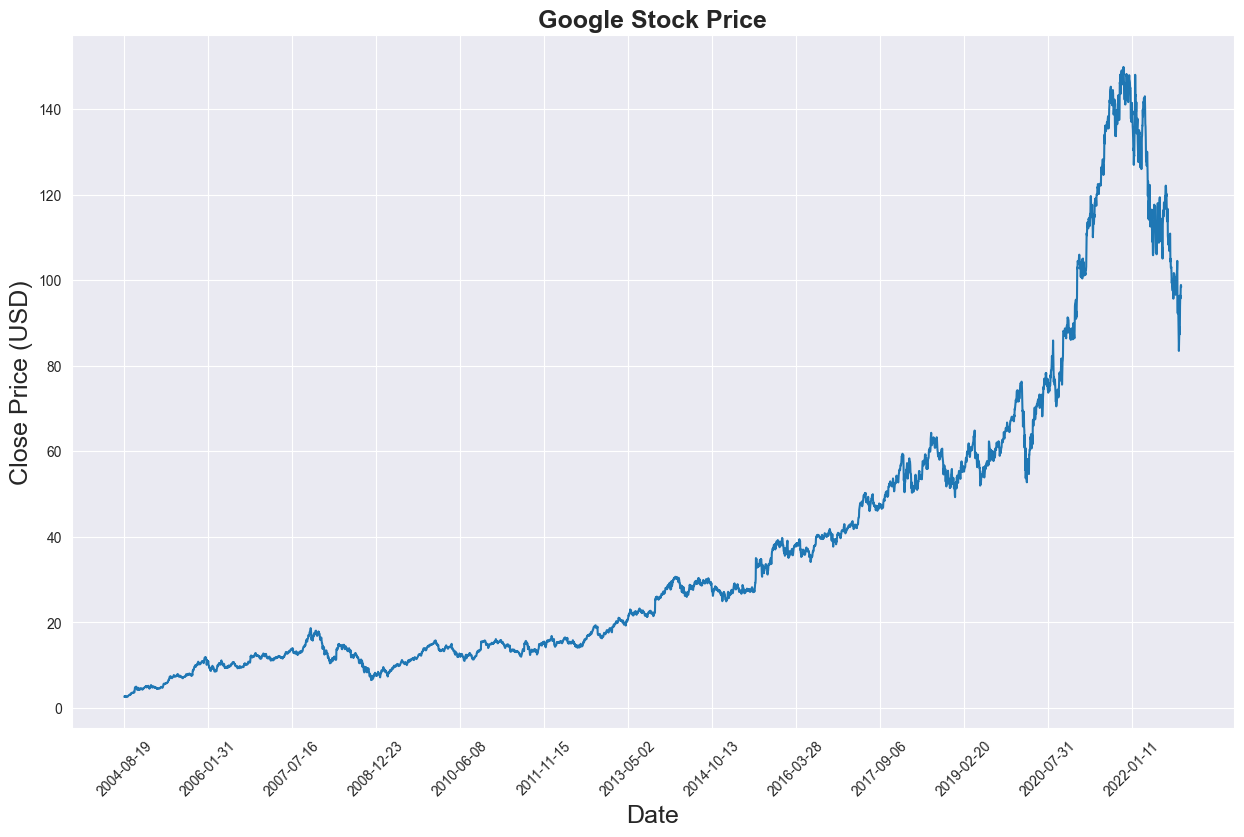

In [14]:
sns.set_style("darkgrid")
plt.figure(figsize = (15, 9))
plt.plot(df[['adjClose']])
plt.xticks(range(0, df.shape[0], 365), df['date'].loc[::365], rotation = 45)
plt.title("Google Stock Price", fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (USD)', fontsize=18)
plt.show()

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
df['adjClose'] = scaler.fit_transform(np.array(df['adjClose']).reshape(-1, 1))

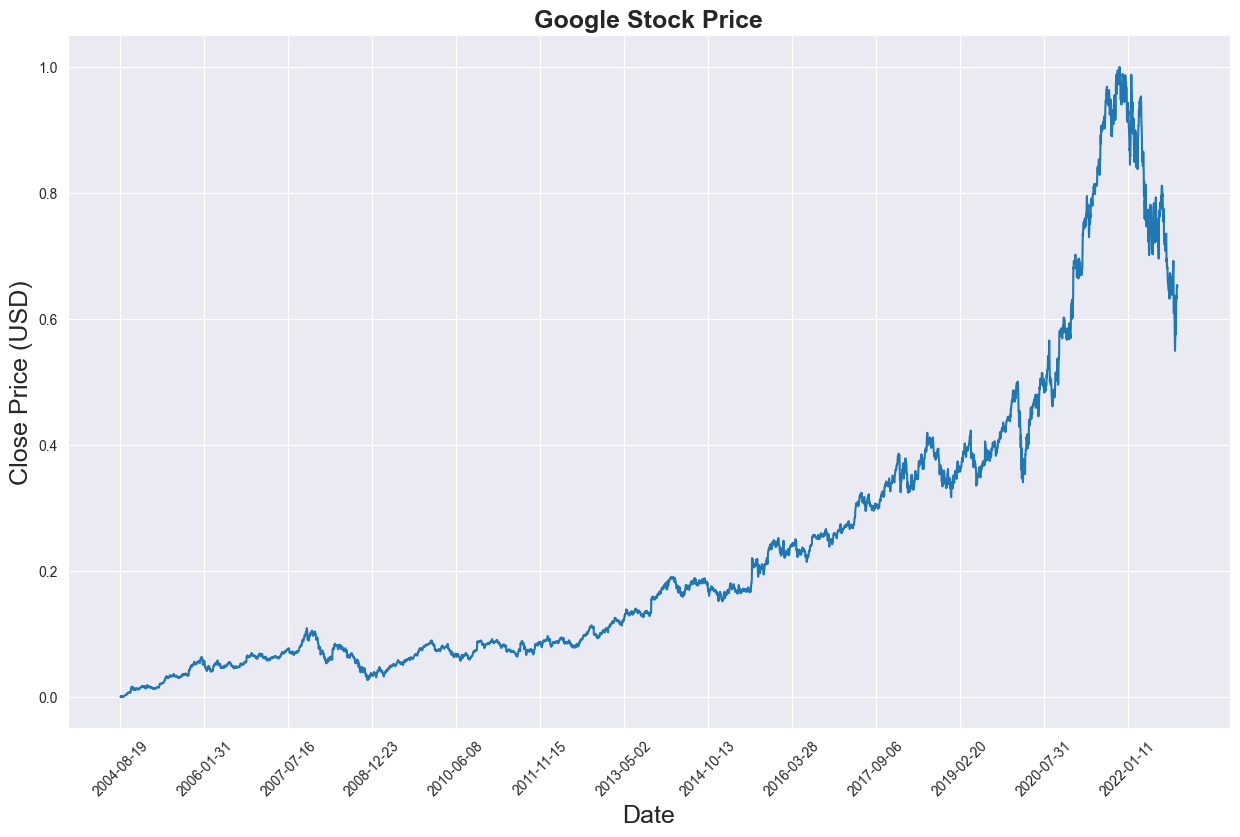

In [16]:
sns.set_style("darkgrid")
plt.figure(figsize = (15, 9))
plt.plot(df[['adjClose']])
plt.xticks(range(0, df.shape[0], 365), df['date'].loc[::365], rotation = 45)
plt.title("Google Stock Price", fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (USD)', fontsize=18)
plt.show()

In [17]:
##splitting dataset into train valid test split
train_size = round(len(df) * 0.80)
remaining_size = len(df) - train_size
val_size = round(0.50 * remaining_size)
train_data, val_data, test_data = df.iloc[0:train_size, :], df.iloc[train_size:(train_size + val_size), :], df.iloc[(train_size + val_size):len(df), :]

In [18]:
df_dates = df.iloc[:,0]

In [19]:
date_train = train_data.iloc[:,0]
date_val = val_data.iloc[:,0]
date_test = test_data.iloc[:,0]

In [20]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset) - time_step -1):
		a = dataset.iloc[i:(i + time_step), 1]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset.iloc[i + time_step, 1])
	return np.array(dataX), np.array(dataY)

In [21]:
# def split_data(stock, lookback):
#     data_raw = stock.to_numpy() # convert to numpy array
#     data = []
    
#     # create all possible sequences of length seq_len
#     for index in range(len(data_raw) - lookback): 
#         data.append(data_raw[index: index + lookback])
    
#     data = np.array(data);
#     test_set_size = int(np.round(0.2*data.shape[0]));
#     train_set_size = data.shape[0] - (test_set_size);
    
#     x_train = data[:train_set_size,:-1,:]
#     y_train = data[:train_set_size,-1,:]
    
#     x_test = data[train_set_size:,:-1]
#     y_test = data[train_set_size:,-1,:]
    
#     return [x_train, y_train, x_test, y_test]

In [22]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [23]:
device = get_default_device()
device

device(type='cuda')

In [24]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
lookback = 100
X_train, y_train = create_dataset(train_data, lookback)
X_val, y_val = create_dataset(val_data, lookback)
X_test, y_test = create_dataset(test_data, lookback)

In [25]:
print(X_train.shape), print(y_train.shape)

(3576, 100)
(3576,)


(None, None)

In [26]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [27]:
y_train = y_train.reshape(y_train.shape[0], 1)
y_val = y_val.reshape(y_val.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)
print(y_val.shape)

(359, 1)


In [28]:
print(X_train.shape), print(y_train.shape)

(3576, 100, 1)
(3576, 1)


(None, None)

In [29]:
# def data_to_device

In [30]:
X_train = torch.from_numpy(X_train).type(torch.Tensor)
X_train = to_device(X_train, device)

X_val = torch.from_numpy(X_val).type(torch.Tensor)
X_val = to_device(X_val, device)

X_test = torch.from_numpy(X_test).type(torch.Tensor)
X_test = to_device(X_test, device)

In [31]:
y_train_rnn = torch.from_numpy(y_train).type(torch.Tensor)
y_train_rnn = to_device(y_train_rnn, device)

y_train_lstm = torch.from_numpy(y_train).type(torch.Tensor)
y_train_lstm = to_device(y_train_lstm, device)

y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_train_gru = to_device(y_train_gru, device)

In [32]:
y_val_rnn = torch.from_numpy(y_val).type(torch.Tensor)
y_val_rnn = to_device(y_val_rnn, device)

y_val_lstm = torch.from_numpy(y_val).type(torch.Tensor)
y_val_lstm = to_device(y_val_lstm, device)

y_val_gru = torch.from_numpy(y_val).type(torch.Tensor)
y_val_gru = to_device(y_val_gru, device)

In [33]:
y_test = torch.from_numpy(y_test).type(torch.Tensor)
y_test = to_device(y_test, device)

In [34]:
# class SequentialBase(nn.Module):
#     def training_step(self, batch):
#         images, labels = batch 
#         out = self(images)                  # Generate predictions
#         loss = F.cross_entropy(out, labels) # Calculate loss
#         acc = accuracy(out, labels)
#         return loss, acc
    
#     def validation_step(self, batch):
#         images, labels = batch 
#         out = self(images)                    # Generate predictions
#         loss = F.cross_entropy(out, labels)   # Calculate loss
#         acc = accuracy(out, labels)           # Calculate accuracy
#         return {'val_loss': loss.detach(), 'val_acc': acc}
        
#     def validation_epoch_end(self, outputs):
#         batch_losses = [x['val_loss'] for x in outputs]
#         epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
#         batch_accs = [x['val_acc'] for x in outputs]
#         epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
#         return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
#     def epoch_end(self, epoch, result):
#         print("Epoch [{}], train_acc: {:.4f}, val_acc: {:.4f}, train_loss: {:.4f}, val_loss: {:.4f}".format(
#             epoch, result['train_acc'], result['val_acc'], result['train_loss'], result['val_loss']))
        
# def accuracy(outputs, labels):
#     preds = torch.argmax(outputs, dim=1)
#     return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [35]:
# Create RNN Model
class RNN_base(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(RNN_base, self).__init__()
        
        # Number of hidden dimensions
        self.hidden_dim = hidden_dim
        
        # Number of hidden layers
        self.layer_dim = layer_dim
        
        # RNN
        self.rnn = nn.RNN(input_dim, hidden_dim, layer_dim, batch_first=True, nonlinearity='relu')
        
        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        
        # Initialize hidden state with zeros
        h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim, device=device))
            
        # One time step
        out, hn = self.rnn(x, h0)
        out = self.fc(out[:, -1, :]) 
        return out

In [36]:
input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 100

In [37]:
def fit(num_epochs, lr, model, loss_type, y_train, opt_func = torch.optim.SGD):
    optimiser = opt_func(model.parameters(), lr)
    hist = np.zeros(num_epochs)
    start_time = time.time()
    for t in range(num_epochs):
        y_train_pred = model(X_train)
        loss = loss_type(y_train_pred, y_train)
        print("Epoch ", t, "MSE: ", loss.item())
        hist[t] = loss.item()            

        # Compute gradients
        loss.backward()

        # Update parameters           
        optimiser.step()

        # Reset gradients
        optimiser.zero_grad()
        
    training_time = time.time()-start_time
    print("Training time: {}".format(training_time))
    return hist, y_train_pred

In [38]:
input_dim = 1
hidden_dim = 32
num_layers = 1
output_dim = 1
num_epochs = 100

In [39]:
torch.manual_seed(42)
model_1 = RNN_base(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = num_layers)
model_1 = to_device(model_1, device)
loss_type = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam
lr = 0.01

In [40]:
X_train.shape

torch.Size([3576, 100, 1])

In [41]:
history, y_train_pred = fit(num_epochs, lr, model_1, loss_type, y_train_rnn, optimiser)

Epoch  0 MSE:  0.01697840727865696
Epoch  1 MSE:  0.014750508591532707
Epoch  2 MSE:  0.013392915949225426
Epoch  3 MSE:  0.01007699966430664
Epoch  4 MSE:  0.010034136474132538
Epoch  5 MSE:  0.010304287075996399
Epoch  6 MSE:  0.009199222549796104
Epoch  7 MSE:  0.00793504063040018
Epoch  8 MSE:  0.007754091173410416
Epoch  9 MSE:  0.0076324669644236565
Epoch  10 MSE:  0.00621145311743021
Epoch  11 MSE:  0.005692209582775831
Epoch  12 MSE:  0.00538109103217721
Epoch  13 MSE:  0.004213643725961447
Epoch  14 MSE:  0.0037297988310456276
Epoch  15 MSE:  0.00292072631418705
Epoch  16 MSE:  0.0016466064844280481
Epoch  17 MSE:  0.0013739237328991294
Epoch  18 MSE:  0.00021329367882572114
Epoch  19 MSE:  0.0006367478636093438
Epoch  20 MSE:  0.000838269479572773
Epoch  21 MSE:  0.0009652719018049538
Epoch  22 MSE:  0.0009835675591602921
Epoch  23 MSE:  0.00034093938302248716
Epoch  24 MSE:  0.00030902973958291113
Epoch  25 MSE:  0.00026151625206694007
Epoch  26 MSE:  5.7146313338307664e-05


In [42]:
predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.cpu().detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_rnn.cpu().detach().numpy()))
original = pd.concat([original, date_train], axis = 1)

In [43]:
original

,0,date
0,4.853482,2004-08-19
1,4.899625,2004-08-20
2,4.898371,2004-08-23
3,5.014730,2004-08-24
4,5.113284,2004-08-25
...,...,...
3672,NaN,2019-03-22
3673,NaN,2019-03-25
3674,NaN,2019-03-26
3675,NaN,2019-03-27


In [44]:
def plot_predictions(pred, true):
    sns.set_style("darkgrid")
    fig = plt.figure(figsize=(12, 5))
    fig.subplots_adjust(hspace=0.2, wspace=0.2)
    ax = sns.lineplot(x = true.index, y = true[0], label="Data", color='royalblue')
    ax = sns.lineplot(x = pred.index, y = pred[0], label="Training Prediction", color='tomato')
    ax.set_title('Stock price', size = 14, fontweight='bold')
    ax.set_xlabel("Days", size = 14)
    ax.set_ylabel("Cost (USD)", size = 14)
    ax.set_xticklabels('', size=10)

def plot_loss(history):
    sns.set_style("darkgrid")
    fig = plt.figure(figsize=(12, 5))
    fig.subplots_adjust(hspace=0.2, wspace=0.2)
    ax = sns.lineplot(data = history, color='royalblue')
    ax.set_xlabel("Epoch", size = 14)
    ax.set_ylabel("Loss", size = 14)
    ax.set_title("Training Loss", size = 14, fontweight='bold')
    fig.set_figheight(6)
    fig.set_figwidth(16)

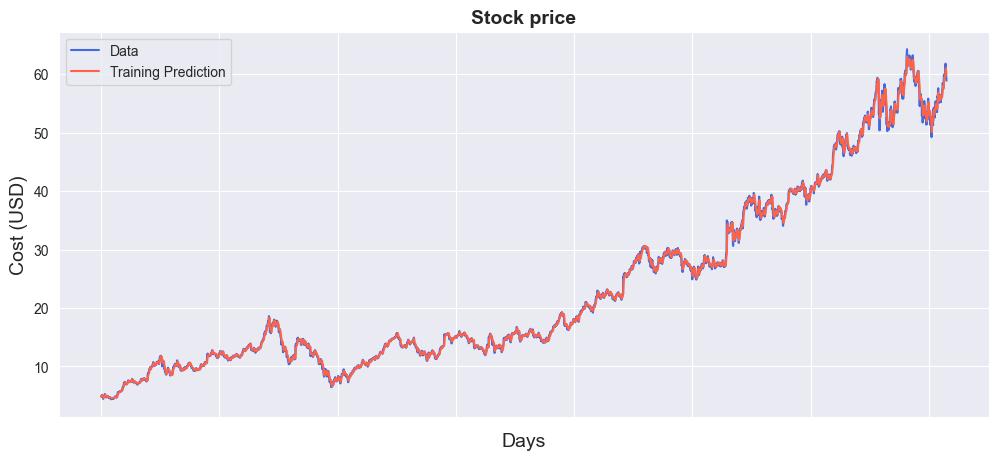

In [45]:
plot_predictions(predict, original)

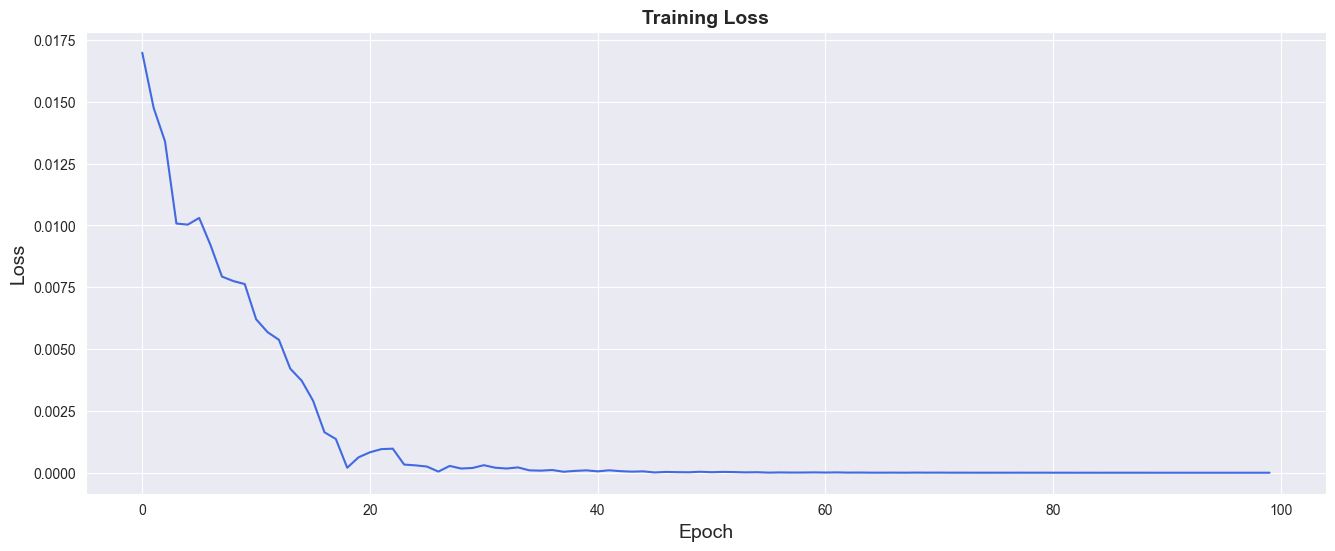

In [46]:
plot_loss(history)

In [47]:
import math, time
from sklearn.metrics import mean_squared_error

# make predictions
y_val_pred = model_1(X_val)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.cpu().detach().numpy())
y_train = scaler.inverse_transform(y_train_rnn.cpu().detach().numpy())
y_val_pred = scaler.inverse_transform(y_val_pred.cpu().detach().numpy())
y_val = scaler.inverse_transform(y_val_rnn.cpu().detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train, y_train_pred))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_val, y_val_pred))
print('Validation Score: %.2f RMSE' % (testScore))

Train Score: 0.51 RMSE
Validation Score: 4.50 RMSE


In [48]:
df_prices =df['adjClose'].values.reshape(-1,1)

In [49]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(df_prices)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(y_train_pred) + lookback, :] = y_train_pred

# shift test predictions for plotting
valPredictPlot = np.empty_like(df_prices)
valPredictPlot[:, :] = np.nan
valPredictPlot[len(y_train_pred)  +(lookback*2)+1: len(y_train_pred) + len(y_val_pred) +(lookback*2)+1, :] = y_val_pred

original = scaler.inverse_transform(df_prices.reshape(-1,1))

predictions = np.append(trainPredictPlot, valPredictPlot, axis=1)
predictions = np.append(predictions, original, axis=1)
result = pd.DataFrame(predictions)
result = pd.concat([result, df_dates], axis = 1)

In [50]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4596 entries, 0 to 4595
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       3576 non-null   float64
 1   1       359 non-null    float64
 2   2       4596 non-null   float64
 3   date    4596 non-null   object 
dtypes: float64(3), object(1)
memory usage: 143.8+ KB


In [51]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=result['date'], y=result[0],
                    mode='lines',
                    name='Train prediction')))
fig.add_trace(go.Scatter(x=result['date'], y=result[1],
                    mode='lines',
                    name='Test prediction'))
fig.add_trace(go.Scatter(go.Scatter(x=result['date'], y=result[2],
                    mode='lines',
                    name='Actual Value')))
fig.update_layout(
    xaxis=dict(
        title_text='Dates',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
    ),
    yaxis=dict(
        title_text='Close (USD)',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
    ),
    showlegend=True,
    template = 'plotly_dark'

)

annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Results (RNN)',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='white'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()

# LSTM Model

In [52]:
class LSTM_model(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM_model, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_dim, device = device))
        c0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_dim, device = device))
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out

In [53]:
input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 100

In [54]:
torch.manual_seed(42)
model_2 = LSTM_model(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, num_layers = num_layers)
model_2 = to_device(model_2, device)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam

In [55]:
history, y_train_pred = fit(num_epochs, lr, model_2, loss_type, y_train_lstm, optimiser)

Epoch  0 MSE:  0.022237030789256096
Epoch  1 MSE:  0.012997833080589771
Epoch  2 MSE:  0.01414537150412798
Epoch  3 MSE:  0.011155936866998672
Epoch  4 MSE:  0.01045528519898653
Epoch  5 MSE:  0.01106908917427063
Epoch  6 MSE:  0.011375105939805508
Epoch  7 MSE:  0.010997476056218147
Epoch  8 MSE:  0.010320761241018772
Epoch  9 MSE:  0.00975959561765194
Epoch  10 MSE:  0.009510899893939495
Epoch  11 MSE:  0.009518241509795189
Epoch  12 MSE:  0.009484406560659409
Epoch  13 MSE:  0.009072727523744106
Epoch  14 MSE:  0.008205920457839966
Epoch  15 MSE:  0.0070664226077497005
Epoch  16 MSE:  0.005808004643768072
Epoch  17 MSE:  0.0038368296809494495
Epoch  18 MSE:  0.0009173050057142973
Epoch  19 MSE:  0.003502617124468088
Epoch  20 MSE:  0.0031135561875998974
Epoch  21 MSE:  0.0036006097216159105
Epoch  22 MSE:  0.001482066698372364
Epoch  23 MSE:  0.0007942248485051095
Epoch  24 MSE:  0.002327029360458255
Epoch  25 MSE:  0.0027865355368703604
Epoch  26 MSE:  0.0015124892815947533
Epoch  

In [56]:
predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.cpu().detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_lstm.cpu().detach().numpy()))
original = pd.concat([original, date_train], axis = 1)

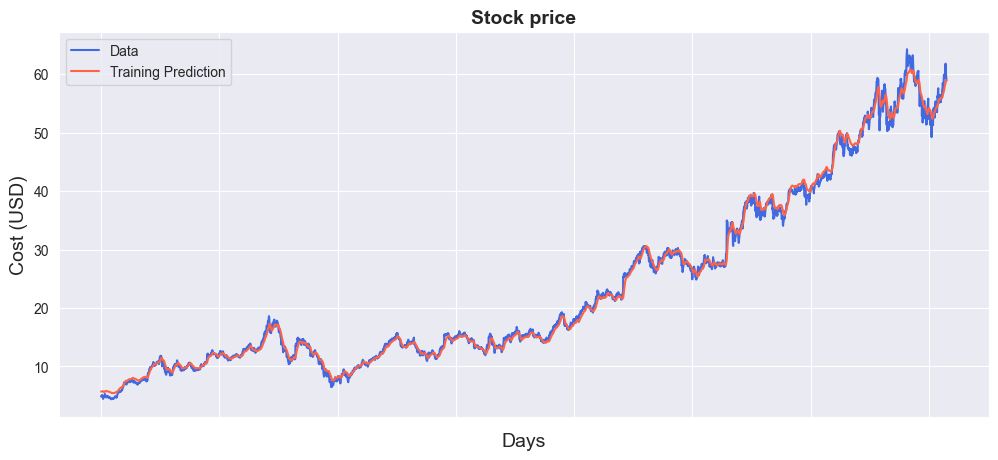

In [57]:
plot_predictions(predict, original)

In [58]:
import math, time
from sklearn.metrics import mean_squared_error

# make predictions
y_val_pred = model_2(X_val)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.cpu().detach().numpy())
y_train = scaler.inverse_transform(y_train_lstm.cpu().detach().numpy())
y_val_pred = scaler.inverse_transform(y_val_pred.cpu().detach().numpy())
y_val = scaler.inverse_transform(y_val_lstm.cpu().detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train, y_train_pred))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_val, y_val_pred))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.87 RMSE
Test Score: 7.56 RMSE


In [59]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(df_prices)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(y_train_pred) + lookback, :] = y_train_pred

# shift test predictions for plotting
valPredictPlot = np.empty_like(df_prices)
valPredictPlot[:, :] = np.nan
valPredictPlot[len(y_train_pred) + (lookback*2) + 1: len(y_train_pred) + len(y_val_pred) +(lookback*2) + 1, :] = y_val_pred

original = scaler.inverse_transform(df_prices.reshape(-1,1))

predictions = np.append(trainPredictPlot, valPredictPlot, axis=1)
predictions = np.append(predictions, original, axis=1)
result = pd.DataFrame(predictions)
result = pd.concat([result, df_dates], axis = 1)

In [60]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=result['date'], y=result[0],
                    mode='lines',
                    name='Train prediction')))
fig.add_trace(go.Scatter(x=result['date'], y=result[1],
                    mode='lines',
                    name='Test prediction'))
fig.add_trace(go.Scatter(go.Scatter(x=result['date'], y=result[2],
                    mode='lines',
                    name='Actual Value')))
fig.update_layout(
    xaxis=dict(
        title_text='Dates',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
    ),
    yaxis=dict(
        title_text='Close (USD)',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
    ),
    showlegend=True,
    template = 'plotly_dark'

)

annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Results (LSTM)',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='white'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()

# GRU

In [61]:
class GRU_model(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(GRU_model, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_dim, device = device))
        out, (hn) = self.gru(x, (h0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out

In [62]:
input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 100
lr = 0.01

In [63]:
torch.manual_seed(42)
model_3 = GRU_model(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, num_layers = num_layers)
model_3 = to_device(model_3, device)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam

In [64]:
history, y_train_pred = fit(num_epochs, lr, model_3, criterion, y_train_gru, optimiser)

Epoch  0 MSE:  0.06539715081453323
Epoch  1 MSE:  0.01817149668931961
Epoch  2 MSE:  0.02631758153438568
Epoch  3 MSE:  0.013226499781012535
Epoch  4 MSE:  0.011470368131995201
Epoch  5 MSE:  0.01570270024240017
Epoch  6 MSE:  0.016045089811086655
Epoch  7 MSE:  0.012875659391283989
Epoch  8 MSE:  0.009716055355966091
Epoch  9 MSE:  0.008599486202001572
Epoch  10 MSE:  0.009379525668919086
Epoch  11 MSE:  0.01032551284879446
Epoch  12 MSE:  0.009886031970381737
Epoch  13 MSE:  0.008229329250752926
Epoch  14 MSE:  0.006627355236560106
Epoch  15 MSE:  0.005996487103402615
Epoch  16 MSE:  0.006182159762829542
Epoch  17 MSE:  0.006185077130794525
Epoch  18 MSE:  0.005156105384230614
Epoch  19 MSE:  0.0033733609598129988
Epoch  20 MSE:  0.002123131649568677
Epoch  21 MSE:  0.0022451782133430243
Epoch  22 MSE:  0.0020680478774011135
Epoch  23 MSE:  0.0003609136037994176
Epoch  24 MSE:  0.0007333883550018072
Epoch  25 MSE:  0.002287146169692278
Epoch  26 MSE:  0.0009640109492465854
Epoch  27 

In [65]:
predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.cpu().detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_gru.cpu().detach().numpy()))
original = pd.concat([original, date_train], axis = 1)

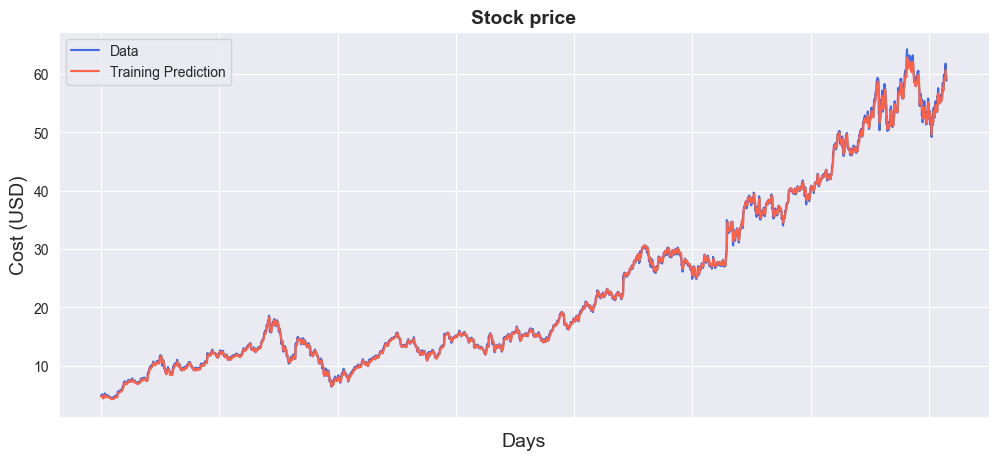

In [66]:
plot_predictions(predict, original)

In [67]:
import math, time
from sklearn.metrics import mean_squared_error

# make predictions
y_val_pred = model_3(X_val)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.cpu().detach().numpy())
y_train = scaler.inverse_transform(y_train_gru.cpu().detach().numpy())
y_val_pred = scaler.inverse_transform(y_val_pred.cpu().detach().numpy())
y_val = scaler.inverse_transform(y_val_gru.cpu().detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train, y_train_pred))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_val, y_val_pred))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.52 RMSE
Test Score: 2.37 RMSE


In [68]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(df_prices)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(y_train_pred) + lookback, :] = y_train_pred

# shift test predictions for plotting
valPredictPlot = np.empty_like(df_prices)
valPredictPlot[:, :] = np.nan
valPredictPlot[len(y_train_pred) + (lookback*2) + 1: len(y_train_pred) + len(y_val_pred) +(lookback*2) + 1, :] = y_val_pred

original = scaler.inverse_transform(df_prices.reshape(-1,1))

predictions = np.append(trainPredictPlot, valPredictPlot, axis=1)
predictions = np.append(predictions, original, axis=1)
result = pd.DataFrame(predictions)
result = pd.concat([result, df_dates], axis = 1)

In [69]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=result['date'], y=result[0],
                    mode='lines',
                    name='Train prediction')))
fig.add_trace(go.Scatter(x=result['date'], y=result[1],
                    mode='lines',
                    name='Test prediction'))
fig.add_trace(go.Scatter(go.Scatter(x=result['date'], y=result[2],
                    mode='lines',
                    name='Actual Value')))
fig.update_layout(
    xaxis=dict(
        title_text='Dates',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
    ),
    yaxis=dict(
        title_text='Close (USD)',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
    ),
    showlegend=True,
    template = 'plotly_dark'

)

annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Results (GRU)',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='white'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()